# Linear Regression

Linear Regression is a supervised machine learning algorithm where the predicted output is **continuous and has a constant slope**. It’s used to predict values within a continuous range, (e.g. sales, price, number of rooms) rather than trying to classify them into categories (e.g. cat, dog).

There are two main types:

**1. Simple Regression:**  Simple linear regression uses traditional slope-intercept form, where m and b are the variables our algorithm will try to “learn” to produce the most accurate predictions x represents our input data and y represents our prediction: **y = mx + b**, where m is the slope and b is the intercept. 

**2. Multivariable Regression:** A more complex, multi-variable linear equation might look like this, where w represents the coefficients, or weights, our model will try to learn: **f(x, y, z) = w1x + w2y + w3z....**, where w1, w2 and w3 are the weights of the model. 

## Importing and loading data

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Data
data = pd.read_csv('datasets/train_cleaned.csv')

# Printing the data
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


## Data Splitting

In [3]:
# Seperating independent and dependent variables

# The X => features and y => output
X = data.drop(['Item_Outlet_Sales'], axis = 1)
y = data['Item_Outlet_Sales']

# Checking the shape
print(X.shape, y.shape)

(8523, 45) (8523,)


In [4]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 56)

# Checking the shape of the data
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6392, 45) (6392,)
(2131, 45) (2131,)


## Model Building

In [5]:
# Creating instance of Linear Regresssion
model = LinearRegression()

# Fitting the model
model.fit(X_train, y_train)

LinearRegression()

In [6]:
# Predicting over the Train Set and calculating error
train_predict = model.predict(X_train)
print('MAE of the training data:', mean_absolute_error(train_predict, y_train).round(3))
print('R2 score of the training data:', round(r2_score(train_predict, y_train), 3))

MAE of the training data: 821.421
R2 score of the training data: 0.25


In [7]:
# Predicting over the Test Set and calculating error
test_predict = model.predict(X_test)
print('MAE of the testing data:', mean_absolute_error(test_predict, y_test).round(3))
print('R2 score of the testing data:', round(r2_score(test_predict, y_test), 3))

MAE of the testing data: 875.269
R2 score of the testing data: 0.115


### Parameters of Linear Regression

In [9]:
# Displaying the coefficients
print(model.coef_[:10])

[ 1.78450035e-01 -3.84642222e+02  1.54980674e+01 -1.84444754e+01
 -3.78808067e+01  3.31502849e+01  4.06819896e+01  4.76424149e+01
 -8.35938826e+01  2.81126002e+00]


### Plotting the coefficients

Text(0.5, 1.0, 'Coefficient plot')

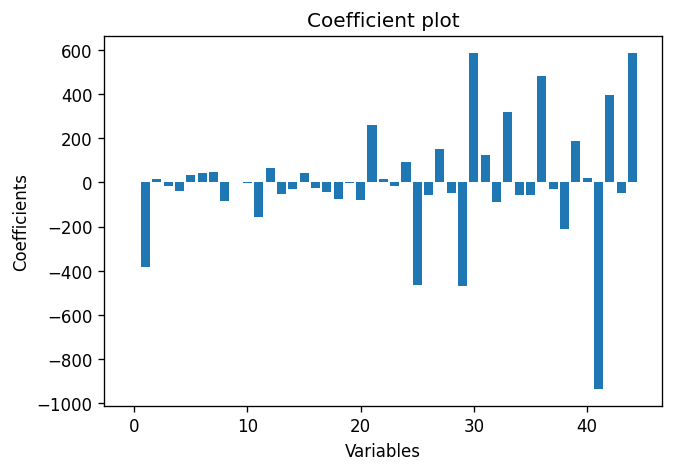

In [10]:
plt.figure(figsize=(6, 4), dpi=120, facecolor = 'w', edgecolor = 'b')
x = range(len(X_train.columns))
y = model.coef_

plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

Here we can see that the model depends upon some Independent variables too much, But these coefficients are not suitable for interpretation because these are not scaled, therefore we will perform the interpretation in this note book later.

### Assumptions of linear model

In [11]:
# Arranging and calculating the residuals
residuals = pd.DataFrame({
    'fitted values': y_test,
    'predicted values': test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
2172,697.7584,906.204648,-208.446248
6228,1414.1592,2544.719495,-1130.560295
2404,3078.6592,3008.957438,69.701762
99,1314.2892,3045.197114,-1730.907914
4945,1403.5064,1453.011713,-49.505313


### Plotting residual curve (Is there any constant variance or homoscedastic?)

Homoscedasticity refers to the assumption that the variance of the errors or residuals in a regression model is constant across all levels of the independent variables.

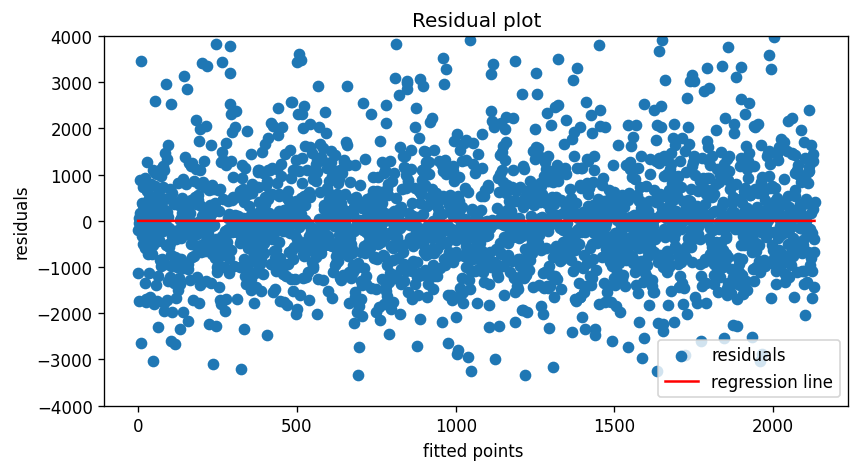

In [14]:
plt.figure(figsize=(8, 4), dpi=120, facecolor='w', edgecolor='b')

f = range(0, 2131)
k = [0 for i in range(0, 2131)]

plt.scatter(f, residuals.residuals[:], label = 'residuals')
plt.plot(f, k , color = 'red', label = 'regression line')
plt.xlabel('fitted points ')
plt.ylabel('residuals')
plt.title('Residual plot')

plt.ylim(-4000, 4000)
plt.legend()

The residual plot clearly Looks Homoscedastic, i.e. the the variance of the error across the dataset is nearly constant.

### Checking Distribution of Residuals

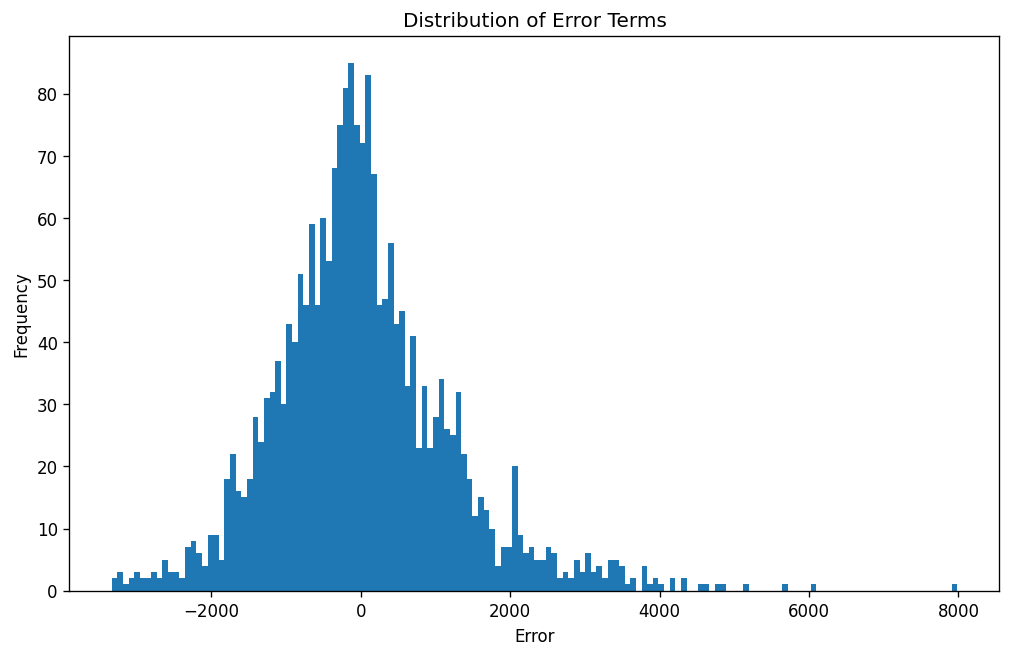

In [25]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

### QQ-Plot (Is the data normally distributed?)

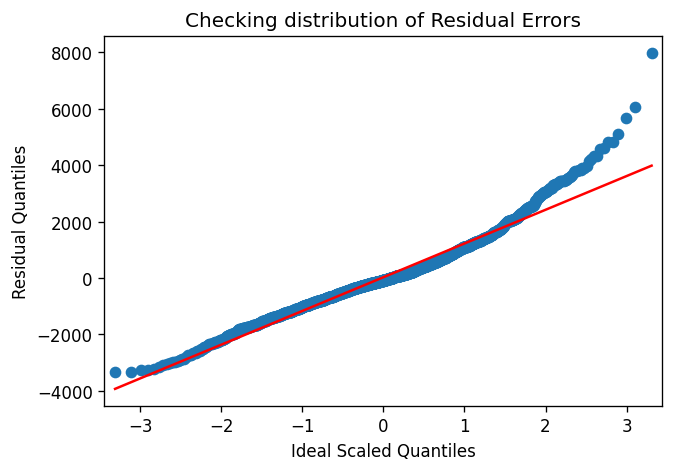

In [17]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(6,4) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)

plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher end of the Residues. From the ACF plot, we can clearly see that there is almost negligible correlation between the error terms. Hence there is no autocorrelation present in the data.

### Variance Inflation Factor (VIF) (Checking for multi collinearity)

In [19]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
VIF.head()

Item_Weight                  2.349925
Item_Visibility              1.101456
Item_MRP                     1.753170
Outlet_Establishment_Year         inf
Item_Outlet_Sales            2.292720
dtype: float64

- There happens to be no Independent Variable over the value of 5, which means that there are no features that exhibit the Multicollinearity in the dataset.
- Note that VIF only works for the Continuous Variables.

## Model Interpretability

So far we have simply been predicting the values using the linear regression, But in order to Interpret the model, the normalising of the data is essential.

In [21]:
# Creating instance of Linear Regresssion
lr = LinearRegression()

# Fitting the model
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(X_train)
k = mean_absolute_error(train_predict, y_train).round(3)
print('Training Mean Absolute Error:', k)

Training Mean Absolute Error: 821.421


In [23]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(X_test)
k = mean_absolute_error(test_predict, y_test).round(3)
print('Test Mean Absolute Error:', k)

Test Mean Absolute Error: 875.269


Text(0.5, 1.0, 'Normalized Coefficient plot')

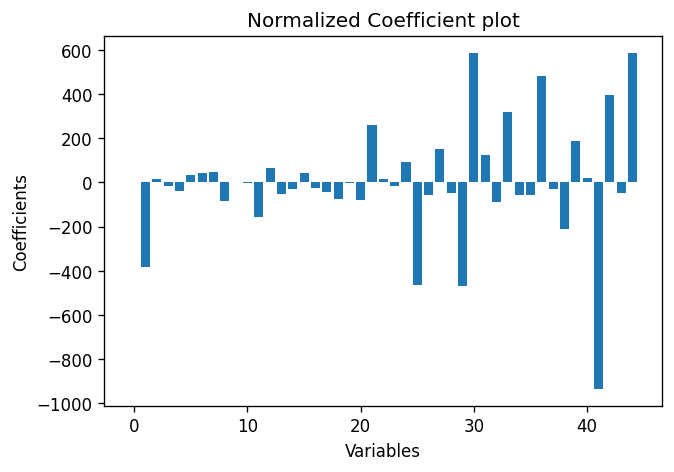

In [24]:
plt.figure(figsize=(6, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(X_train.columns))
y = lr.coef_
plt.bar(x, y)
plt.xlabel("Variables")
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')

Now the coefficients we see are normalised and we can easily make final inferences out of it. Here we can see that there are a lot of Coefficients which are near to zero and not Significant. So let us try removing them and build the model again.

#### Creating new subsets of data

In [26]:
#seperating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'], axis=1)
y = data['Item_Outlet_Sales']
x.shape, y.shape

((8523, 45), (8523,))

#### Arranging coefficients with features

In [27]:
Coefficients = pd.DataFrame({
    'Variable'    : x.columns,
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,Item_Weight,0.178450
1,Item_Visibility,-384.642222
2,Item_MRP,15.498067
3,Outlet_Establishment_Year,-18.444475
4,Item_Fat_Content_LF,-37.880807


#### Chossing variables with significance greater than 0.5 (Filtering Significant Features)

In [28]:
sig_var = Coefficients[Coefficients.coefficient > 0.5]

#### Extracting the significant subset do independent Variables

In [29]:
subset = data[sig_var['Variable'].values]
subset.head()

,Item_MRP,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Type_Baking Goods,Item_Type_Canned,Item_Type_Fruits and Vegetables,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Starchy Foods,Outlet_Identifier_OUT017,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT046,Outlet_Size_Medium,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
0,249.8092,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,48.2692,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,141.6180,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,182.0950,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,53.8614,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0


#### Splitting the data into train set and the test set

In [30]:
# Importing the train test split function
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(subset, y , random_state = 56)

#### Implementing Linear Regression

In [31]:
#importing Linear Regression and metric mean square error
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import mean_absolute_error as mae

#### Training Model

In [32]:
# Creating instance of Linear Regresssion with Normalised Data
lr = LR()

# Fitting the model
lr.fit(train_x, train_y)

LinearRegression()

#### Predicting over the train set

In [33]:
# Predicting over the Train Set and calculating error
train_predict = lr.predict(train_x)
k = mae(train_predict, train_y).round(3)
print('Training Mean Absolute Error:', k)

Training Mean Absolute Error: 830.669


#### Predicting over the test set

In [34]:
# Predicting over the Test Set and calculating error
test_predict = lr.predict(test_x)
k = mae(test_predict, test_y).round(3)
print('Test Mean Absolute Error:', k )

Test Mean Absolute Error: 888.862


#### Plotting the coefficients

Text(0.5, 1.0, 'Normalized Coefficient plot')

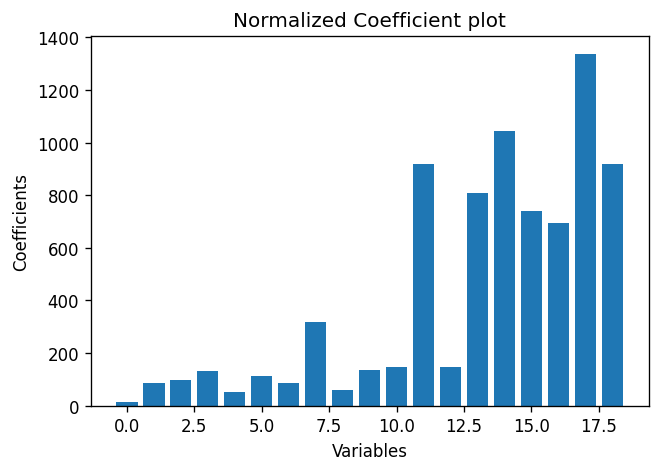

In [35]:
plt.figure(figsize = (6, 4), dpi = 120, facecolor = 'w', edgecolor = 'b')
x = range(len(train_x.columns))
y = lr.coef_

plt.bar(x, y)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Normalized Coefficient plot')